In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conditionDF = pd.read_csv('condition.csv')

In [49]:
conditionDF['visit_datetime_difference']=(pd.to_datetime(conditionDF['visit_end_datetime'])-pd.to_datetime(conditionDF['visit_start_datetime']))
conditionDF['condition_datetime_difference']=(pd.to_datetime(conditionDF['condition_end_datetime'])-pd.to_datetime(conditionDF['condition_start_datetime']))

In [50]:
persondrop=['location_id','provider_id','care_site_id','person_source_value','race_source_value',
            'gender_source_value','ethnicity_source_value','birth_datetime']
visitdrop=['visit_source_value','visit_start_date','visit_end_date','visit_start_datetime','visit_end_datetime']
conditiondrop=['condition_source_value','condition_source_concept_id','condition_end_date',
              'condition_start_date','condition_end_datetime','condition_start_datetime']

In [51]:
conditionDF=conditionDF.drop(columns=persondrop)
conditionDF=conditionDF.drop(columns=visitdrop)
conditionDF=conditionDF.drop(columns=conditiondrop)

In [52]:
conditionDF.loc[pd.isnull(conditionDF['death_date']) , 'death'] = 0
conditionDF.loc[pd.isnull(conditionDF['death_date'])==False , 'death'] = 1

In [53]:
deathdrop=['death_date','death_datetime','death_type_concept_id','cause_source_concept_id']
conditionDF=conditionDF.drop(columns=deathdrop)

In [54]:
another=conditionDF.groupby('person_id').count()['visit_occurrence_id'].reset_index()

In [55]:
another2=conditionDF[['person_id','death']]

In [56]:
another3=pd.merge(another, another2, on='person_id', how='inner').drop_duplicates()

In [57]:
anotherdeaths=another3[another3['death']==1]
anotheralive=another3[another3['death']==0]

(-225.0, 1000)

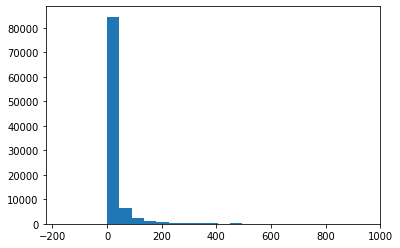

In [58]:
plt.hist(anotheralive['visit_occurrence_id'],bins=100)
plt.xlim(xmax = 1000)

(array([967.,  66.,  36.,   7.,   4.,   1.,   4.,   1.,   3.,   3.,   0.,
          0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  40.95,  80.9 , 120.85, 160.8 , 200.75, 240.7 , 280.65,
        320.6 , 360.55, 400.5 , 440.45, 480.4 , 520.35, 560.3 , 600.25,
        640.2 , 680.15, 720.1 , 760.05, 800.  ]),
 <a list of 20 Patch objects>)

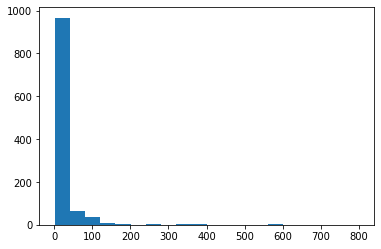

In [59]:
plt.hist(anotherdeaths['visit_occurrence_id'],bins=20)

In [60]:
categorical= ['person_id','visit_occurrence_id','ethnicity_concept_id','race_concept_id','gender_concept_id',
             'visit_concept_id','visit_type_concept_id','condition_status_concept_id','condition_type_concept_id',
             'condition_concept_id','condition_occurrence_id']
for col in categorical:
    conditionDF[col] = conditionDF[col].astype('object')
conditionDF['death'] = conditionDF['death'].astype(int)

In [61]:
percent_missing = conditionDF.isnull().sum() * 100 / len(conditionDF)
missing_value_df = pd.DataFrame({'column_name': conditionDF.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
person_id,person_id,0.000000
visit_occurrence_id,visit_occurrence_id,0.000075
year_of_birth,year_of_birth,0.000000
ethnicity_concept_id,ethnicity_concept_id,0.000000
month_of_birth,month_of_birth,0.000000
day_of_birth,day_of_birth,0.000000
race_concept_id,race_concept_id,13.274920
gender_concept_id,gender_concept_id,0.000000
visit_concept_id,visit_concept_id,0.000075
visit_type_concept_id,visit_type_concept_id,0.000075


In [62]:
conditionDF.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

person_id                        97918
visit_occurrence_id             943947
ethnicity_concept_id                 2
race_concept_id                      6
gender_concept_id                    2
visit_concept_id                     3
visit_type_concept_id                1
condition_status_concept_id          1
condition_type_concept_id            2
condition_concept_id              7080
condition_occurrence_id        1625309
dtype: int64

In [63]:
deaths=conditionDF[conditionDF['death']==1]
alive=conditionDF[conditionDF['death']==0]

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.62131e+06, 3.09050e+04, 2.38950e+04, 1.86800e+04, 1.46270e+04,
        9.98800e+03, 1.71180e+04, 2.79180e+04, 1.77300e+03, 1.48700e+03,
        1.18300e+03, 1.13500e+03, 2.62000e+03, 8.46000e+02, 6.57000e+02,
        5.37000e+02, 4.99000e+02, 9.96200e+03, 5.01000e+02, 1.19000e+02,
        1.59000e+02, 1.22000e+02, 1.08000e+02, 1.09000e+02, 1.54000e+02,
        6.40000e+01, 5.20000e+01, 5.40000e+01, 8.50000e+01, 6.13000e+02]),
 array([  0.,  28.,  56.,  84., 112., 140., 168., 196., 224., 252., 280.,
        308., 336., 364., 392., 420., 448., 476., 504., 532., 560., 588.,
        616., 644., 672., 700., 728., 756., 784., 812., 840.]),
 <a list of 30 Patch objects>)

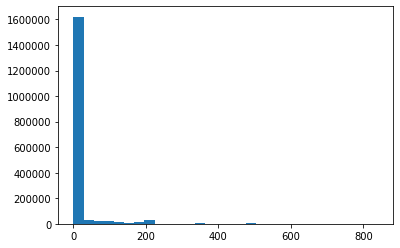

In [64]:
plt.hist(alive['condition_datetime_difference'].astype('timedelta64[h]'),bins=30)

(array([1.2746e+04, 2.4100e+02, 1.7300e+02, 1.6200e+02, 1.1200e+02,
        8.0000e+01, 1.3200e+02, 2.1500e+02, 1.6000e+01, 1.1000e+01,
        1.1000e+01, 1.5000e+01, 3.0000e+01, 1.4000e+01, 2.0000e+00,
        4.0000e+00, 5.0000e+00, 6.8000e+01, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([  0.,  28.,  56.,  84., 112., 140., 168., 196., 224., 252., 280.,
        308., 336., 364., 392., 420., 448., 476., 504., 532., 560., 588.,
        616., 644., 672., 700., 728., 756., 784., 812., 840.]),
 <a list of 30 Patch objects>)

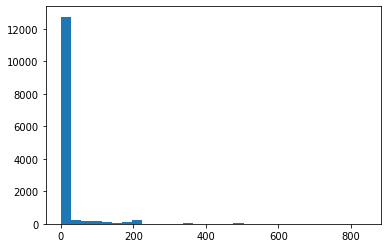

In [65]:
plt.hist(deaths['condition_datetime_difference'].astype('timedelta64[h]'),bins=30)

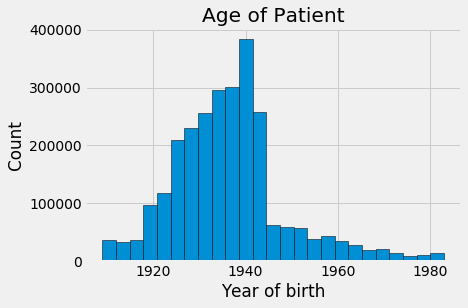

In [66]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(conditionDF['year_of_birth'], edgecolor = 'k', bins = 25)
plt.title('Age of Patient'); plt.xlabel('Year of birth'); plt.ylabel('Count');

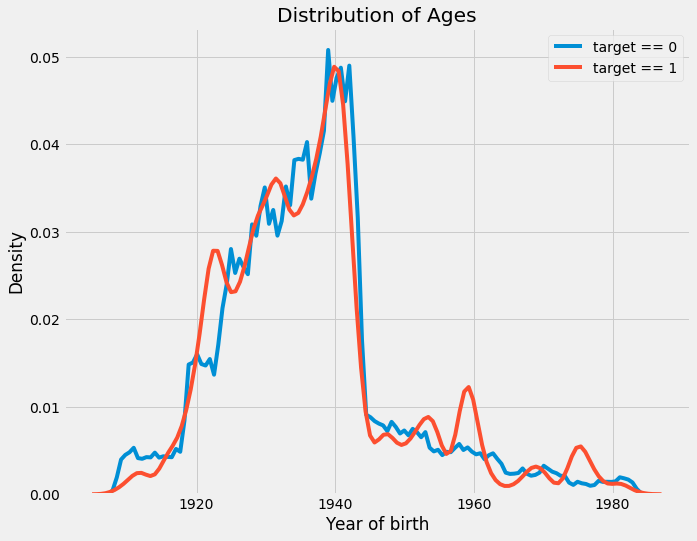

In [67]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(conditionDF.loc[conditionDF['death'] == 0, 'year_of_birth'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(conditionDF.loc[conditionDF['death'] == 1, 'year_of_birth'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Year of birth'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [68]:
# Age information into a separate dataframe
age_data = conditionDF[['death', 'year_of_birth']]

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['year_of_birth'], bins = np.linspace(1900, 2000, num = 11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,death,year_of_birth
YEARS_BINNED,,
"(1900.0, 1910.0]",0.002220,1909.559497
"(1910.0, 1920.0]",0.007391,1916.855246
"(1920.0, 1930.0]",0.009772,1926.271634
"(1930.0, 1940.0]",0.009163,1935.903308
"(1940.0, 1950.0]",0.007501,1943.348660
"(1950.0, 1960.0]",0.013859,1955.139356
"(1960.0, 1970.0]",0.006357,1964.898648
"(1970.0, 1980.0]",0.013453,1974.772346
"(1980.0, 1990.0]",0.007295,1981.882838


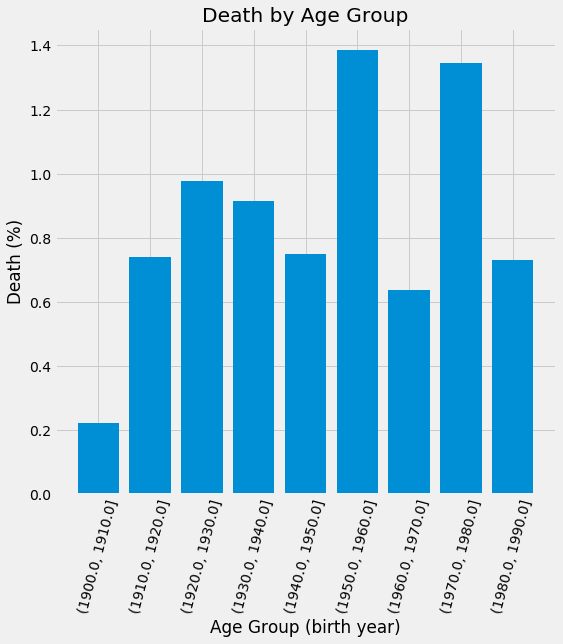

In [69]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['death'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (birth year)'); plt.ylabel('Death (%)')
plt.title('Death by Age Group');

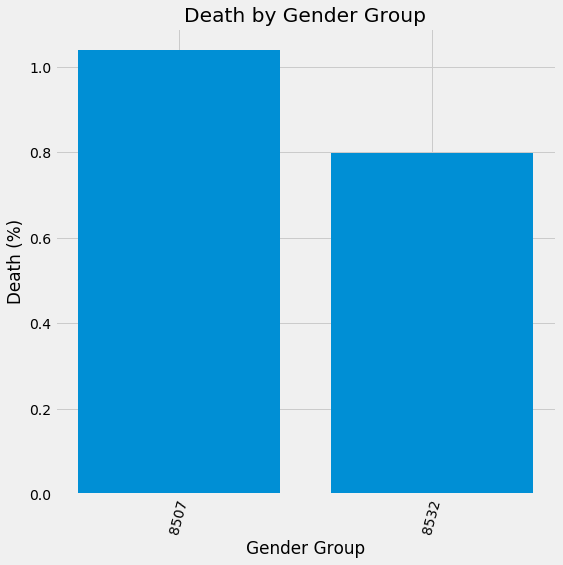

In [70]:
# Age information into a separate dataframe
gender_data = conditionDF[['death', 'gender_concept_id']]

# Bin the age data
gender_groups  = gender_data.groupby('gender_concept_id').mean()
gender_groups
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(gender_groups.index.astype(str), 100 * gender_groups['death'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Gender Group'); plt.ylabel('Death (%)')
plt.title('Death by Gender Group');

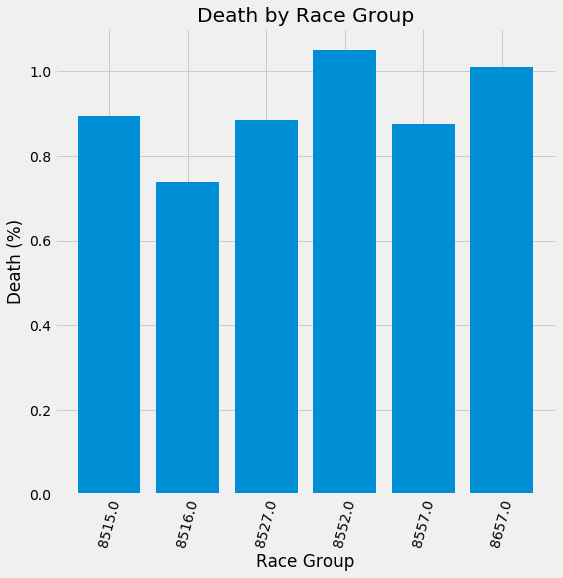

In [71]:
# Age information into a separate dataframe
race_data = conditionDF[['death', 'race_concept_id']]

# Bin the age data
race_groups  = race_data.groupby('race_concept_id').mean()
race_groups
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(race_groups.index.astype(str), 100 * race_groups['death'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Race Group'); plt.ylabel('Death (%)')
plt.title('Death by Race Group');

In [18]:
conditionDF.to_csv("condition2.csv")